<a href="https://colab.research.google.com/github/munisdev86/fastai-dl-pt1/blob/main/02_save_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

# def is_cat(x): return x[0].is_super() 
def is_cat(x): return x[0].isupper() 

In [3]:
path = untar_data(URLs.PETS)


In [4]:
path

Path('/root/.fastai/data/oxford-iiit-pet')

In [5]:
!pwd

/content


In [6]:
!ls /root/.fastai/data/oxford-iiit-pet/images/|wc -l

7393


In [7]:
path = path/'images'

In [8]:
path


Path('/root/.fastai/data/oxford-iiit-pet/images')

In [9]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

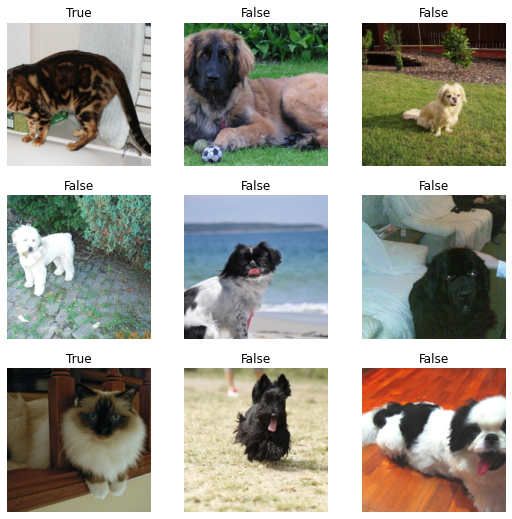

In [10]:
dls.show_batch()

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.191418,0.043865,0.016238,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.066820,0.039113,0.015562,00:44
1,0.041955,0.026724,0.008119,00:44
2,0.020961,0.021127,0.006766,00:43


In [12]:
files = get_image_files(path)

In [14]:
len(files)

7390

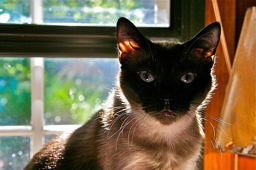

In [16]:
Image.open(files[0]).to_thumb(256,256)

In [15]:
learn.predict(files[0])

('True', TensorBase(1), TensorBase([1.3362e-10, 1.0000e+00]))

TypeError: ignored

In [19]:
print(f'{files[0]} is predicted as {learn.predict(files[0])}')

/root/.fastai/data/oxford-iiit-pet/images/Siamese_149.jpg is predicted as ('True', TensorBase(1), TensorBase([1.3362e-10, 1.0000e+00]))


In [20]:
for i in range(10):
  print(f'{files[i]} is predicted as {learn.predict(files[i])}')

/root/.fastai/data/oxford-iiit-pet/images/Siamese_149.jpg is predicted as ('True', TensorBase(1), TensorBase([1.3362e-10, 1.0000e+00]))


/root/.fastai/data/oxford-iiit-pet/images/beagle_145.jpg is predicted as ('False', TensorBase(0), TensorBase([0.9945, 0.0055]))


/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_120.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 3.5886e-08]))


/root/.fastai/data/oxford-iiit-pet/images/Birman_53.jpg is predicted as ('True', TensorBase(1), TensorBase([9.5287e-10, 1.0000e+00]))


/root/.fastai/data/oxford-iiit-pet/images/Bengal_61.jpg is predicted as ('True', TensorBase(1), TensorBase([2.1040e-14, 1.0000e+00]))


/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_38.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9995e-01, 4.8671e-05]))


/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_173.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 5.4962e-07]))


/root/.fastai/data/oxford-iiit-pet/images/Bengal_146.jpg is predicted as ('True', TensorBase(1), TensorBase([2.9955e-15, 1.0000e+00]))


/root/.fastai/data/oxford-iiit-pet/images/keeshond_60.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 3.0766e-06]))


/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_143.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9999e-01, 5.1338e-06]))


In [21]:
#export model
learn.export('cat_model.pkl')

In [23]:
learn_inf = load_learner('cat_model.pkl')

In [24]:
for i in range(10):
  print(f'{files[i]} is predicted as {learn_inf.predict(files[i])}')

/root/.fastai/data/oxford-iiit-pet/images/Siamese_149.jpg is predicted as ('True', TensorBase(1), TensorBase([1.3362e-10, 1.0000e+00]))


/root/.fastai/data/oxford-iiit-pet/images/beagle_145.jpg is predicted as ('False', TensorBase(0), TensorBase([0.9945, 0.0055]))


/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_120.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 3.5886e-08]))


/root/.fastai/data/oxford-iiit-pet/images/Birman_53.jpg is predicted as ('True', TensorBase(1), TensorBase([9.5287e-10, 1.0000e+00]))


/root/.fastai/data/oxford-iiit-pet/images/Bengal_61.jpg is predicted as ('True', TensorBase(1), TensorBase([2.1040e-14, 1.0000e+00]))


/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_38.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9995e-01, 4.8671e-05]))


/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_173.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 5.4961e-07]))


/root/.fastai/data/oxford-iiit-pet/images/Bengal_146.jpg is predicted as ('True', TensorBase(1), TensorBase([2.9955e-15, 1.0000e+00]))


/root/.fastai/data/oxford-iiit-pet/images/keeshond_60.jpg is predicted as ('False', TensorBase(0), TensorBase([1.0000e+00, 3.0766e-06]))


/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_143.jpg is predicted as ('False', TensorBase(0), TensorBase([9.9999e-01, 5.1339e-06]))
